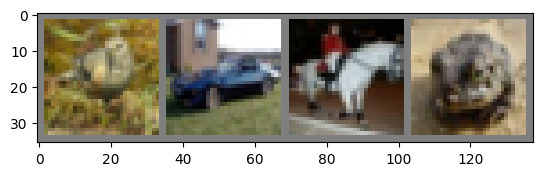

bird  car   horse frog 


In [2]:
%load_ext tensorboard

from model import Net, train
from data import *
from utils import imshow

In [ ]:
# from distributed_setup import run
# from itertools import product

# # HP_BATCH_SIZE = [100,1000,5000]
# # HP_NUM_WORKERS = [0,4,8,16]
# HP_BATCH_SIZE = [1000]
# HP_NUM_WORKERS = [0]


# model = Net()

# for batch_size, num_workers in product(HP_BATCH_SIZE, HP_NUM_WORKERS):
#   run(
#       model,
#       train,
#       trainset,
#       {'batch_size': batch_size, 'num_workers': num_workers}
#   )

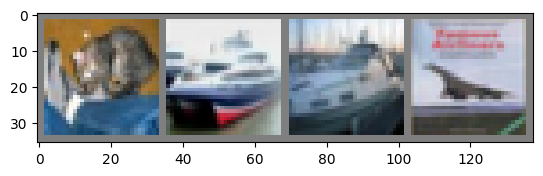

GroundTruth:  cat   ship  ship  plane
Predicted:  horse horse horse horse
Accuracy of the network on the 10000 test images: 10 %
Accuracy for class: plane is 0.2 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.1 %
Accuracy for class: horse is 100.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %


In [3]:
import torch
from model import test

PATH = './cifar_net_gpu_distributed.pth'


dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

reloaded_model = Net()
reloaded_model.load_state_dict(torch.load(PATH))

outputs = reloaded_model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

test(reloaded_model)